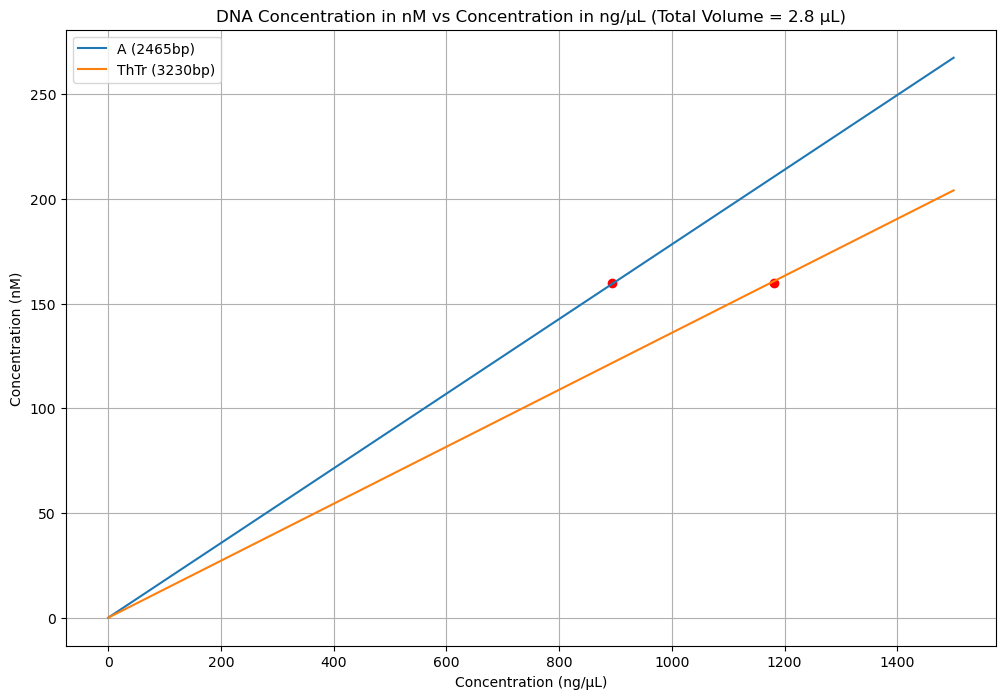

  Construct  Concentration (ng/µL)
0         A             893.939394
1      ThTr            1181.818182


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_dna_concentration_with_marker(constructs, marker_nM=50, total_volume=7):
    """
    Plots DNA concentration in nM vs concentration in ng/µL and marks the point where the concentration is at the specified marker_nM.

    Parameters:
    - constructs (dict): A dictionary of DNA constructs with their lengths in base pairs.
    - marker_nM (float): The concentration in nM where the marker should be placed. Default is 50 nM.
    - total_volume (float): The total volume of the solution in microliters.
                           It's assumed that 1 µL of DNA is in this total volume.
    """
    # Define constants
    average_mw_per_bp = 650
    volume_ul = 0.8e6  # Volume of 1 liter in microliters

    # Generate concentration range
    concentration_range_ng_per_ul = np.linspace(0, 1500, 100)  # ng/µL range
    
    # Prepare the plot
    plt.figure(figsize=(12, 8))

    # Iterate over each construct
    table_data = []
    
    for construct, size_bp in constructs.items():
        # Calculate concentrations in nM for the given range
        concentration_nM_values = []
        for conc_ng_per_ul in concentration_range_ng_per_ul:
            concentration_g_per_l = conc_ng_per_ul * 1e-6  # Convert ng/µL to g/L
            molecular_weight = size_bp * average_mw_per_bp  # Molecular weight of the DNA (g/mol)
            concentration_m = concentration_g_per_l / molecular_weight  # Concentration in moles per liter (M)
            
            # Adjust to the actual total volume, assuming 1 µL of DNA in total_volume µL
            concentration_nM = (concentration_m * volume_ul * 1e6) / total_volume  # Convert to nM
            concentration_nM_values.append(concentration_nM)

        # Plot the result for this construct
        plt.plot(concentration_range_ng_per_ul, concentration_nM_values, label=f'{construct} ({size_bp}bp)')
        
        # Find the closest value to marker_nM and mark it
        concentration_nM_values = np.array(concentration_nM_values)
        closest_index = np.argmin(np.abs(concentration_nM_values - marker_nM))
        closest_conc_ng_per_ul = concentration_range_ng_per_ul[closest_index]
        plt.scatter(closest_conc_ng_per_ul, marker_nM, color='red')  # Mark the marker_nM point
        
        # Append the result to the table data
        table_data.append([construct, closest_conc_ng_per_ul])

    # Set plot details
    plt.xlabel('Concentration (ng/µL)')
    plt.ylabel('Concentration (nM)')
    plt.title(f'DNA Concentration in nM vs Concentration in ng/µL (Total Volume = {total_volume} µL)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and display the table
    df = pd.DataFrame(table_data, columns=["Construct", "Concentration (ng/µL)"])
    print(df)

# Example usage
constructs = {
    'A': 2465,
    # 'B': 2459,
    # 'C': 2471,  
    # 'D': 2459,
    # 'E': 3056, 
    # 'F': 3044, 
    # 'G': 3056,
    # 'H': 3044,
    'ThTr': 3230,
    # 'DiPu_513': 2801,
    # 'BleSto_572': 2987,
    # 'Kif5a_500': 2765,
    # 'AdPa_408': 2212,
    # 'HeAl_513': 2801,
    # 'NaGr_392': 2438,
    # 'TiLa_514': 2801,
    # 'AcSu_575': 2987,
    # 'AcSu2_530': 2852
}
plot_dna_concentration_with_marker(constructs, marker_nM=160, total_volume=2.8)  # You can change the marker_nM and total volume here